## Gradient Descent for Logistic Regression

This lab will focus on: 
* learning to update the gradient descent for logistic regression, not linear regression
* exploring such gradient descent algorithm on a familiar data set
  

## Tools

In [1]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_common import dlc, plot_data, plt_tumor_data, sigmoid, compute_cost_logistic
from plt_quad_logistic import plt_quad_logistic, plt_prob
plt.style.use("./deeplearning.mplstyle")

## Dataset

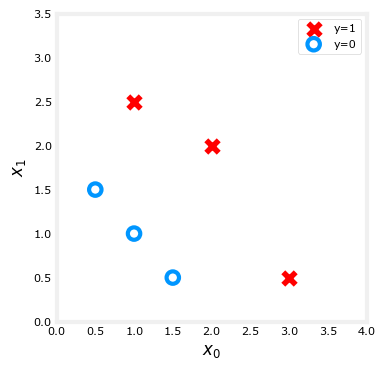

In [3]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])
fig,ax = plt.subplots(1,1,figsize=(4,4))
plot_data(X_train, y_train, ax)

ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.show()

## Gradient Descent

In [4]:
# Derivates with respect to w and b
def compute_gradient_logistic(X, y, w, b): 
    """
    Computes the gradient for logistic regression 
 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
    Returns
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape
    dj_dw = np.zeros((n,))                           #(n,)
    dj_db = 0.                                       #scalar 

    for i in range(m):                                #loops over all data points
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          #(n,)(n,) = predicitive scalar 
        err_i  = f_wb_i  - y[i]                       #error scalar 
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #loops over all features, scalar
        dj_db = dj_db + err_i                         
    dj_dw = dj_dw/m                                   #(n,) --> weights for each feature 
    dj_db = dj_db/m                                   #scalar
        
    return dj_db, dj_dw  

In [5]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_db_tmp, dj_dw_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]


## grafient 